# Compare DEGs (mRNA and lncRNAs) between bulk mouse and bulk rat

## <br> 1. Import Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
from matplotlib_venn import venn2

In [3]:
import os

# Directory name
figures_dir = "Figures"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Directory '{figures_dir}' created.")
else:
    print(f"Directory '{figures_dir}' already exists.")


Directory 'Figures' already exists.


## <br> 2. Import Data

In [4]:
Mouse_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)

Mouse_Master['Dose'] = Mouse_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.03', '0.1', '0.3', '1', '3', '10', '30']

# Convert 'Dose' column to a categorical type with the specified order
Mouse_Master['Dose'] = pd.Categorical(Mouse_Master['Dose'], categories=dose_order, ordered=True)

Mouse_Master

/tmp/local/51388227/ipykernel_2167213/179934410.py:1: DtypeWarning: Columns (18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  Mouse_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',


,Gene,MGI_Symbol,Dose,pDRE,AHR,Type,baseMean,Log2FC,Fold-Change,lfcSE,...,padj,chrom,start,end,frame,score,strand,gene_id,transcript_id,NR_annotation
0,lnc100,.,0.03,1,0,lncRNA,0.738981,0.862954,1.818759,2.429333,...,NaN,chr1,21246734,21250265,.,1000,+,lnc_inter_chr1_100,lnc_inter_chr1_100,lnc100
1,lnc1000,Gm32128,0.03,0,8,lncRNA,0.821042,0.929693,1.904871,1.989028,...,NaN,chr1,191152395,191156841,.,1000,+,lnc_inter_chr1_1000,lnc_inter_chr1_1000,lnc1000
2,lnc10003,Gm51875,0.03,0,0,lncRNA,0.300701,0.000000,1.000000,5.656128,...,NaN,chr11,94897782,94903363,.,1000,-,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003
3,lnc10003,Gm36385,0.03,0,0,lncRNA,0.300701,0.000000,1.000000,5.656128,...,NaN,chr11,94897782,94903363,.,1000,-,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003
4,lnc10004,Dlx4os,0.03,1,0,lncRNA,2.027109,0.000000,1.000000,1.904898,...,1.000000e+00,chr11,95035841,95050060,.,1000,+,lnc_as_chr11_10004,lnc_as_chr11_10004,lnc10004_Dlx4os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365969,mt-Nd4l,.,30,0,0,mitochondrial protein-coding gene,28.894681,-0.353649,0.782602,0.350916,...,4.619477e-01,chrM,9876,10173,.,.,+,ENSMUSG00000065947,ENSMUSG00000065947,NaN
365970,mt-Nd4,.,30,0,0,mitochondrial protein-coding gene,98368.928940,-0.549831,0.683100,0.082421,...,2.695554e-10,chrM,10166,11544,.,.,+,ENSMUSG00000064363,ENSMUSG00000064363,NaN
365971,mt-Nd5,.,30,0,0,mitochondrial protein-coding gene,67723.157378,-0.101532,0.932043,0.100825,...,4.622247e-01,chrM,11741,13565,.,.,+,ENSMUSG00000064367,ENSMUSG00000064367,NaN
365972,mt-Nd6,.,30,0,0,mitochondrial protein-coding gene,19830.183491,0.154663,1.113162,0.185883,...,5.561182e-01,chrM,13551,14070,.,.,-,ENSMUSG00000064368,ENSMUSG00000064368,NaN


In [5]:
Rat_Master = pd.read_csv('../03_Rat_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Rat_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)

Rat_Master['Dose'] = Rat_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.01','0.03', '0.1', '0.3', '1', '3', '10']

# Convert 'Dose' column to a categorical type with the specified order
Rat_Master['Dose'] = pd.Categorical(Rat_Master['Dose'], categories=dose_order, ordered=True)

Rat_Master

,Gene,Dose,pDRE,AHR,transcript_type,baseMean,Log2FC,Fold-Change,lfcSE,stat,pvalue,padj,source
0,lnc1000,0.01,0,1,lncRNA,1.021823,-0.020692,0.985760,1.991121,-0.010392,9.917083e-01,NaN,liftover
1,lnc10000,0.01,1,0,lncRNA,0.046372,-0.929325,0.525104,6.005823,-0.154737,8.770284e-01,NaN,liftover
2,lnc10001,0.01,0,0,lncRNA,0.146825,0.000000,1.000000,6.005823,0.000000,1.000000e+00,NaN,liftover
3,lnc10003,0.01,2,0,lncRNA,0.177874,0.032402,1.022714,6.005823,0.005395,9.956953e-01,NaN,liftover
4,lnc10004,0.01,7,1,lncRNA,0.740087,0.000000,1.000000,3.592880,0.000000,1.000000e+00,NaN,liftover
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722234,LOC120099597,10,1,0,predicted_lncRNA,0.092333,-1.398142,0.379417,6.005823,-0.232798,8.159184e-01,NaN,ncbiRefSeq
7722237,Dkc1,10,0,2,mRNA,277.395024,1.901728,3.736606,0.248099,7.665213,1.785343e-14,1.705286e-12,ncbiRefSeq
7722252,LOC103694537,10,0,0,predicted_mRNA,17.353741,0.172073,1.126676,0.466195,0.369101,7.120523e-01,8.501281e-01,ncbiRefSeq
7722264,LOC120099632,10,0,0,predicted_mRNA,0.048942,0.000000,1.000000,6.005823,0.000000,1.000000e+00,NaN,ncbiRefSeq


## <br> 3a. Determine DE lncRNAs in Mouse vs Rat Bulk RNAseq

In [6]:
Mouse_Master_lncRNA = Mouse_Master[(Mouse_Master['Type']== 'lncRNA') |
                                     (Mouse_Master['Type']== 'antisense') |
                                     (Mouse_Master['Type']== 'lincRNA') |
                                     (Mouse_Master['Type']== 'NR') |
                                     (Mouse_Master['Type']== 'lncOfInterest')]

Mouse_Master_lncRNA_DEGs = Mouse_Master_lncRNA[((Mouse_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Mouse_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Mouse_Master_lncRNA['padj'] <= 0.05)]

Mouse_Master_lncRNA_DEGs_with_AHR = Mouse_Master_lncRNA_DEGs[Mouse_Master_lncRNA_DEGs['AHR'] >= 1]

Mouse_Master_lncRNA_DEGs_with_AHR_and_DRE = Mouse_Master_lncRNA_DEGs_with_AHR[Mouse_Master_lncRNA_DEGs_with_AHR['pDRE'] >= 1]


# Number of unique 'Gene' values for each DataFrame
num_unique_genes_lncRNA = Mouse_Master_lncRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Mouse_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = Mouse_Master_lncRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = Mouse_Master_lncRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Mouse RNAseq")
print("Total lncRNAs:", num_unique_genes_lncRNA)
print("Total DE lncRNAs:", num_unique_genes_DEGs)
print("Total DE lncRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE lncRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)

Mouse RNAseq
Total lncRNAs: 29240
Total DE lncRNAs: 2386
Total DE lncRNAs with AHR binding: 1089
Total DE lncRNAs with AHR binding and DRE: 516


In [7]:
Rat_Master_lncRNA = Rat_Master[(Rat_Master['transcript_type']== 'lncRNA')]

Rat_Master_lncRNA_DEGs = Rat_Master_lncRNA[((Rat_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Rat_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Rat_Master_lncRNA['padj'] <= 0.05)]

Rat_Master_lncRNA_DEGs_with_AHR = Rat_Master_lncRNA_DEGs[Rat_Master_lncRNA_DEGs['AHR'] >= 1]

Rat_Master_lncRNA_DEGs_with_AHR_and_DRE = Rat_Master_lncRNA_DEGs_with_AHR[Rat_Master_lncRNA_DEGs_with_AHR['pDRE'] >= 1]


# Number of unique 'Gene' values for each DataFrame
num_unique_genes_lncRNA = Rat_Master_lncRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Rat_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = Rat_Master_lncRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = Rat_Master_lncRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Rat RNAseq")
print("Total lncRNAs:", num_unique_genes_lncRNA)
print("Total DE lncRNAs:", num_unique_genes_DEGs)
print("Total DE lncRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE lncRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)


Rat RNAseq
Total lncRNAs: 21649
Total DE lncRNAs: 916
Total DE lncRNAs with AHR binding: 290
Total DE lncRNAs with AHR binding and DRE: 258


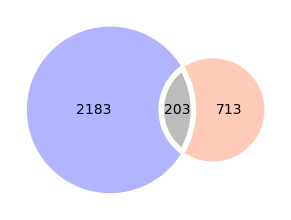

In [8]:
# Prepare the data
Mouse_lncRNA_DEGs_List = Mouse_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')
Rat_Master_lncRNA_DEGs_List = Rat_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')

# Convert to sets
Mouse_set = set(Mouse_lncRNA_DEGs_List)
Rat_set = set(Rat_Master_lncRNA_DEGs_List)

# Create Venn diagram
plt.figure(figsize=(3.5, 6))
venn = venn2([Mouse_set, Rat_set], ('Mouse lncRNA DEGs', 'Rat lncRNA DEGs'))

# Set custom colors
venn.get_patch_by_id('10').set_color('#4145FF')  # Left circle (Mouse)
venn.get_patch_by_id('01').set_color('#FF7B4C')  # Right circle (Rat)
venn.get_patch_by_id('11').set_color('#BCBCBC')  # Overlap

venn.get_patch_by_id('10').set_linewidth(0)
venn.get_patch_by_id('01').set_linewidth(0)

# Add thick white border to overlap
venn.get_patch_by_id('11').set_edgecolor('white')
venn.get_patch_by_id('11').set_linewidth(4)
venn.get_patch_by_id('11').set_alpha(1)

# Remove labels
for text in venn.set_labels:
    text.set_text('')

# Export the plot as a PDF
plt.savefig('Figures/Venn_Mouse_vs_Rat_Bulk_DE_lncRNAs.pdf')

plt.show()

In [14]:
Rat_Master_lncRNA_DEGs_List

188        lnc10258
1392       lnc12779
3725        lnc1828
7980       lnc30088
8160       lnc30576
             ...   
6641375     Mir7116
6641412       Zfas1
6844040        Gcgr
7226002        Dnlz
7688230       Rn45s
Name: Gene, Length: 916, dtype: object

In [10]:
# Find the intersection (common genes) between Mouse and Rat sets
common_genes = Mouse_set.intersection(Rat_set)

# Convert to a list (if needed)
common_genes_list = list(common_genes)

# Convert the list of common genes into a DataFrame
common_genes_df = pd.DataFrame(common_genes_list)

# Export to a tab-delimited text file
common_genes_df.to_csv('Figures/Common_Mouse_Rat_lncRNA_DEGs.txt', 
                       sep='\t', 
                       index=False, 
                       header=False)

## <br> 3b. Determine DE mRNAs in Mouse vs Rat Bulk RNAseq

In [11]:
Mouse_Master_mRNA = Mouse_Master[(Mouse_Master['Type'] == 'NM') |
                                    (Mouse_Master['Type'] == 'NM#NR')|
                                    (Mouse_Master['Type'] == 'protein_coding')]

Mouse_Master_mRNA_DEGs = Mouse_Master_mRNA[((Mouse_Master_mRNA['Fold-Change'] >= 1.5) | 
                                              (Mouse_Master_mRNA['Fold-Change'] <= 1/1.5)) &
                                              (Mouse_Master_mRNA['padj'] <= 0.05)]

Mouse_Master_mRNA_DEGs_with_AHR = Mouse_Master_mRNA_DEGs[Mouse_Master_mRNA_DEGs['AHR'] >= 1]

Mouse_Master_mRNA_DEGs_with_AHR_and_DRE = Mouse_Master_mRNA_DEGs_with_AHR[Mouse_Master_mRNA_DEGs_with_AHR['pDRE'] >= 1]

# Number of unique 'Gene' values for each DataFrame
num_unique_genes_mRNA = Mouse_Master_mRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Mouse_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = Mouse_Master_mRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = Mouse_Master_mRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Mouse RNAseq")
print("Total mRNAs:", num_unique_genes_mRNA)
print("Total DE mRNAs:", num_unique_genes_DEGs)
print("Total DE mRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE mRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)

Mouse RNAseq
Total mRNAs: 17166
Total DE mRNAs: 6071
Total DE mRNAs with AHR binding: 3414
Total DE mRNAs with AHR binding and DRE: 2344


In [12]:
Rat_Master_mRNA = Rat_Master[(Rat_Master['transcript_type'] == 'mRNA')]

Rat_Master_mRNA_DEGs = Rat_Master_mRNA[((Rat_Master_mRNA['Fold-Change'] >= 1.5) | 
                                              (Rat_Master_mRNA['Fold-Change'] <= 1/1.5)) &
                                              (Rat_Master_mRNA['padj'] <= 0.05)]

Rat_Master_mRNA_DEGs_with_AHR = Rat_Master_mRNA_DEGs[Rat_Master_mRNA_DEGs['AHR'] >= 1]

Rat_Master_mRNA_DEGs_with_AHR_and_DRE = Rat_Master_mRNA_DEGs_with_AHR[Rat_Master_mRNA_DEGs_with_AHR['pDRE'] >= 1]

# Number of unique 'Gene' values for each DataFrame
num_unique_genes_mRNA = Rat_Master_mRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Rat_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = Rat_Master_mRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = Rat_Master_mRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Rat RNAseq")
print("Total mRNAs:", num_unique_genes_mRNA)
print("Total DE mRNAs:", num_unique_genes_DEGs)
print("Total DE mRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE mRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)

Rat RNAseq
Total mRNAs: 14306
Total DE mRNAs: 3056
Total DE mRNAs with AHR binding: 1226
Total DE mRNAs with AHR binding and DRE: 1162


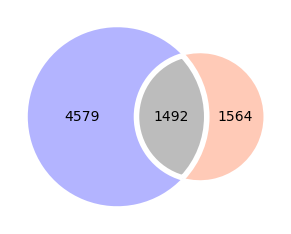

In [13]:
# Prepare the data
Mouse_mRNA_DEGs_List = Mouse_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first')
Rat_Master_mRNA_DEGs_List = Rat_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first')

# Convert to sets
Mouse_set = set(Mouse_mRNA_DEGs_List)
Rat_set = set(Rat_Master_mRNA_DEGs_List)

# Create Venn diagram
plt.figure(figsize=(3.5, 6))
venn = venn2([Mouse_set, Rat_set], ('Mouse lncRNA DEGs', 'Rat lncRNA DEGs'))

# Set custom colors
venn.get_patch_by_id('10').set_color('#4145FF')  # Left circle (Mouse)
venn.get_patch_by_id('01').set_color('#FF7B4C')  # Right circle (Rat)
venn.get_patch_by_id('11').set_color('#BCBCBC')  # Overlap

venn.get_patch_by_id('10').set_linewidth(0)
venn.get_patch_by_id('01').set_linewidth(0)

# Add thick white border to overlap
venn.get_patch_by_id('11').set_edgecolor('white')
venn.get_patch_by_id('11').set_linewidth(4)
venn.get_patch_by_id('11').set_alpha(1)

# Remove labels
for text in venn.set_labels:
    text.set_text('')

# Export the plot as a PDF
plt.savefig('Figures/Venn_Mouse_vs_Rat_Bulk_DE_mRNAs.pdf')

plt.show()
